# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

About the data: Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 

* Sales -- Unit sales (in thousands) at each location
* Competitor Price -- Price charged by competitor at each location
* Income -- Community income level (in thousands of dollars)
* Advertising -- Local advertising budget for company at each location (in thousands of dollars)
* Population -- Population size in region (in thousands)
* Price -- Price company charges for car seats at each site
* Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
* Age -- Average age of the local population
* Education -- Education level at each location
* Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
* US -- A factor with levels No and Yes to indicate whether the store is in the US or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [2]:
company=pd.read_csv("F:/ExcelR workings/Assignments/Decision Trees/Company_Data.CSV")

In [3]:
company.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


<AxesSubplot:>

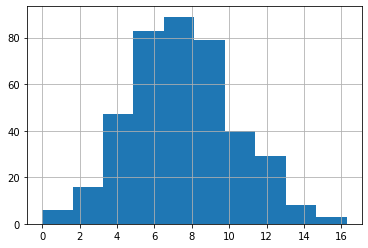

In [4]:
company['Sales'].hist()

<AxesSubplot:>

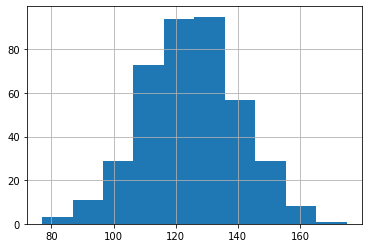

In [5]:
company['CompPrice'].hist()

<AxesSubplot:>

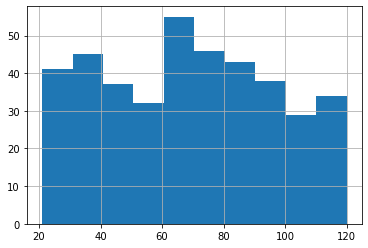

In [6]:
company['Income'].hist()

<AxesSubplot:>

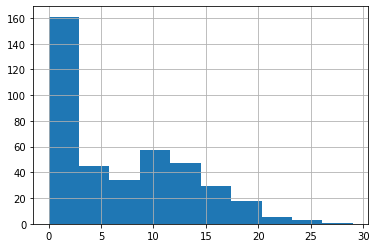

In [7]:
company['Advertising'].hist()

<AxesSubplot:>

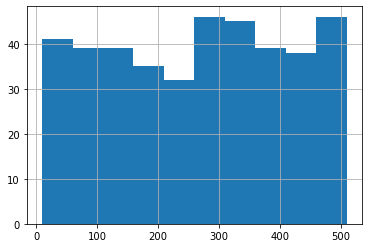

In [8]:
company['Population'].hist()

<AxesSubplot:>

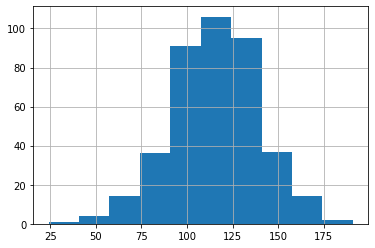

In [9]:
company['Price'].hist()

<AxesSubplot:>

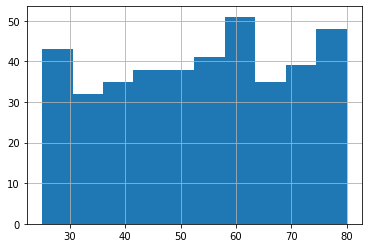

In [10]:
company['Age'].hist()

<AxesSubplot:>

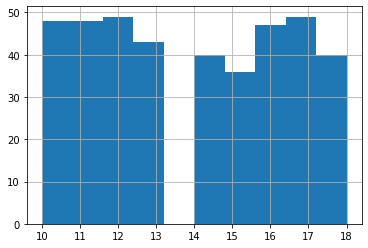

In [11]:
company['Education'].hist()

<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

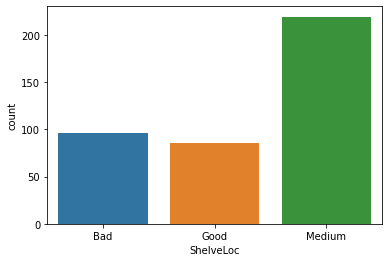

In [12]:
sns.countplot(x="ShelveLoc",data=company)

<AxesSubplot:xlabel='Urban', ylabel='count'>

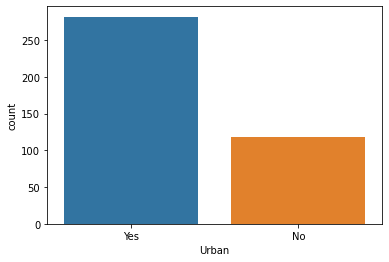

In [13]:
sns.countplot(x="Urban",data=company)

<AxesSubplot:xlabel='US', ylabel='count'>

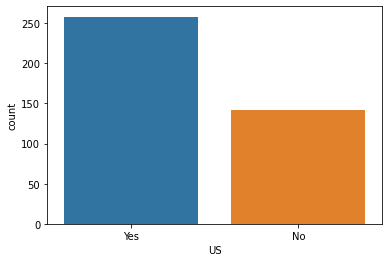

In [14]:
sns.countplot(x="US",data=company)

In [15]:
##Checking for maximum and minimum values to decide what will be the cut off point
company['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [16]:
company['Sales'].median()

7.49

In [17]:
Company=company.copy()

In [18]:
##Converting it Sales variable into categorical data
## Dividing data into levels on the basis of middle value which is Less than 7.5 and greater than 7.5 
np.median(company["Sales"])
company["sales"]= "<=7.49"
company.loc[company["Sales"]>7.49,"sales"]=">7.49"

In [19]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,>7.49
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,>7.49
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,>7.49
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,>7.49
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,<=7.49
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,<=7.49
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,<=7.49


In [20]:
company["sales"].unique()

array(['>7.49', '<=7.49'], dtype=object)

In [21]:
company.drop(["Sales"],axis=1,inplace = True)

In [22]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,>7.49
396,139,23,3,37,120,Medium,55,11,No,Yes,<=7.49
397,162,26,12,368,159,Medium,40,18,Yes,Yes,<=7.49
398,100,79,7,284,95,Bad,50,12,Yes,Yes,<=7.49


In [23]:
## Company data has no null values
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [24]:
##Checking the data type
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CompPrice    400 non-null    int64 
 1   Income       400 non-null    int64 
 2   Advertising  400 non-null    int64 
 3   Population   400 non-null    int64 
 4   Price        400 non-null    int64 
 5   ShelveLoc    400 non-null    object
 6   Age          400 non-null    int64 
 7   Education    400 non-null    int64 
 8   Urban        400 non-null    object
 9   US           400 non-null    object
 10  sales        400 non-null    object
dtypes: int64(7), object(4)
memory usage: 34.5+ KB


In [25]:
# Encode the data.
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
for column_name in company.columns:
    if company[column_name].dtype == object:
        company[column_name] = label_encoder.fit_transform(company[column_name])
    else:
        pass

In [26]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [27]:
company.ShelveLoc.unique()

array([0, 1, 2])

In [28]:
company.Urban.unique()

array([1, 0])

In [29]:
company.US.unique()

array([1, 0])

In [30]:
company.sales.unique()

array([1, 0])

In [31]:
company['sales'].value_counts()

0    201
1    199
Name: sales, dtype: int64

In [32]:
##Splitting the data into featuers and labels
x=company.iloc[:,:10]
y=company.iloc[:,10]

In [33]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [34]:
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: sales, Length: 400, dtype: int32

In [35]:
## Collecting the column names
colnames = list(company.columns)

In [36]:
colnames

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'sales']

#### Splitting the data into train and test¶

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=44)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((280, 10), (120, 10), (280,), (120,))

### Building Decision Tree classifier using Entropy Criteria

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

##### Without providing max_depth

In [40]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

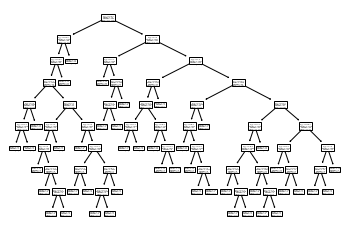

In [41]:
tree.plot_tree(model);

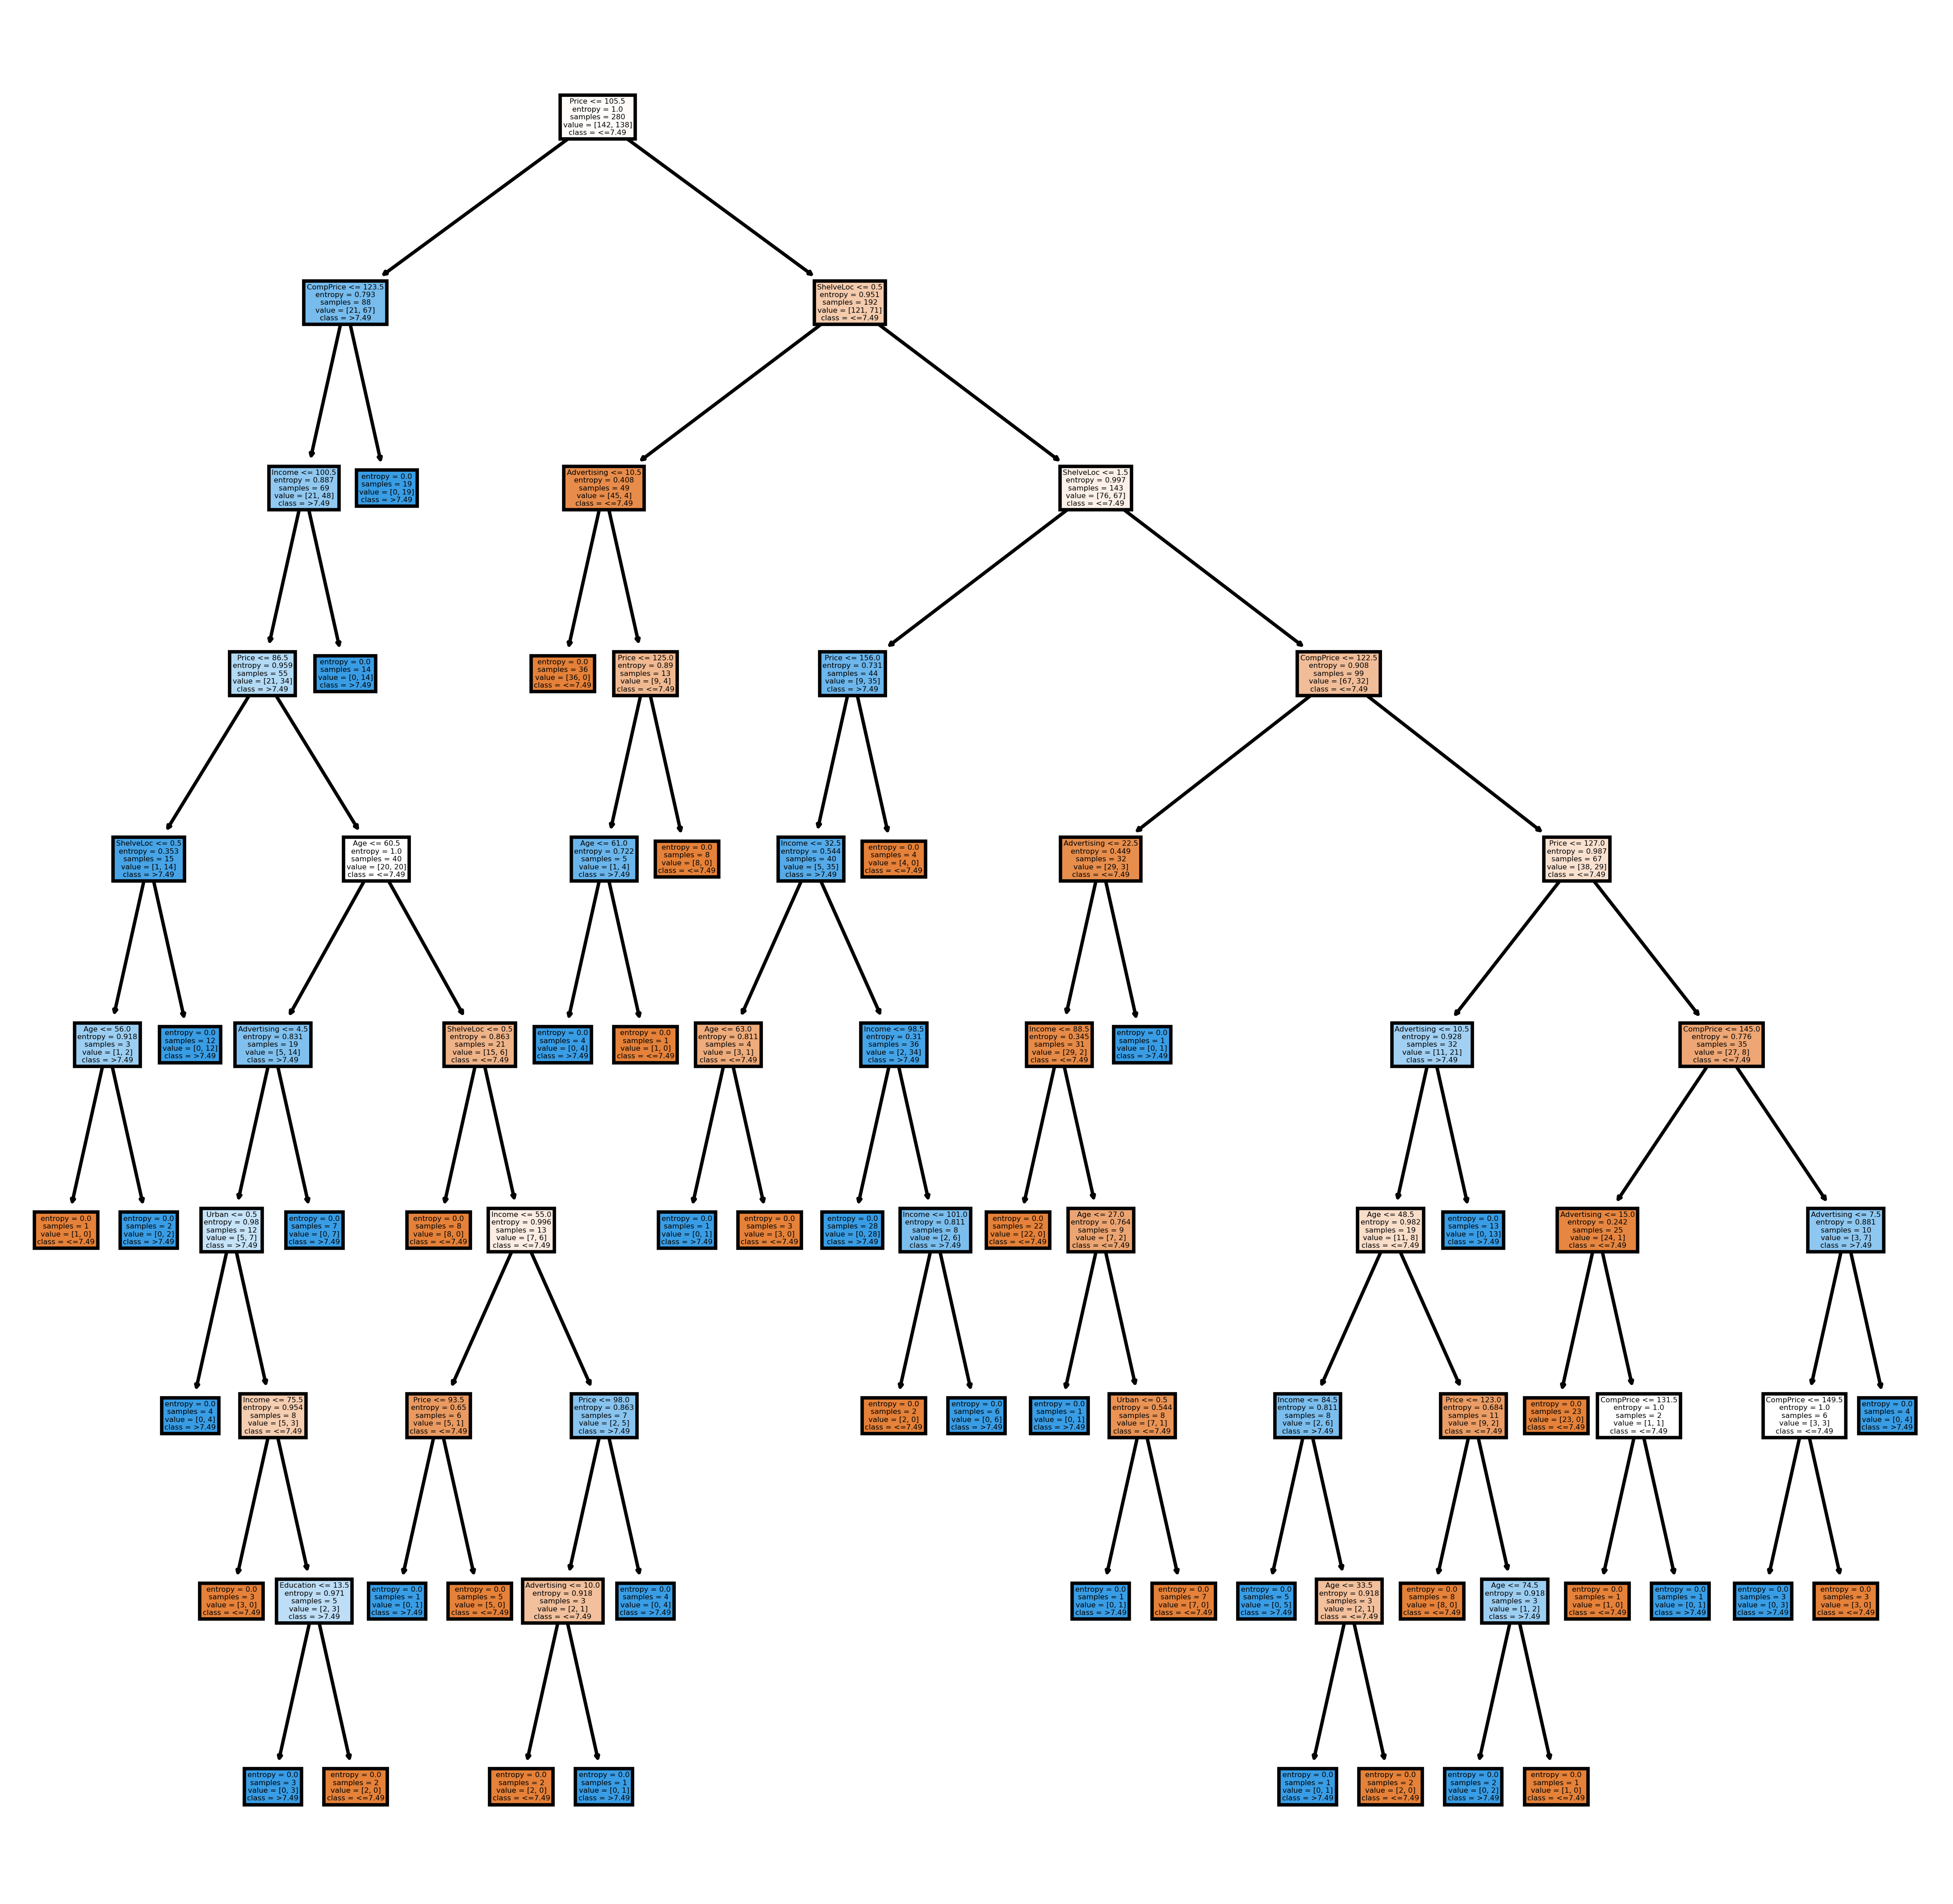

In [42]:
fn=['CompPrice','Income','Advertising', 'Population',
 'Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US',]
cn=['<=7.49', '>7.49']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=550)
tree.plot_tree(model,
               feature_names=fn, 
               class_names=cn,
               filled= True);

In [43]:
# Prediction on Training data
pred_train= model.predict(x_train)
pd.Series(pred_train).value_counts() 

0    142
1    138
dtype: int64

In [44]:
# Finding Accuracy for train data
acc_train = accuracy_score(y_train,pred_train)

In [45]:
acc_train

1.0

In [46]:
## Confusion matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_train,pred_train,))
confusion_mat

,0,1
0,142,0
1,0,138


In [47]:
# Predicting the test data
preds= model.predict(x_test)
pd.Series(preds).value_counts() # getting the count of each category

1    60
0    60
dtype: int64

In [48]:
preds

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [49]:
# Accuracy
np.mean(preds==y_test)

0.7416666666666667

In [50]:
# Accuracy on test data
acc_test = accuracy_score(y_test,preds)
acc_test

0.7416666666666667

In [51]:
# Confusion matrix
confusion_test=pd.DataFrame(confusion_matrix(y_test,preds))
confusion_test

,0,1
0,44,15
1,16,45


#### With max_depth

In [52]:
model1=DecisionTreeClassifier(criterion='entropy', max_depth=5)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

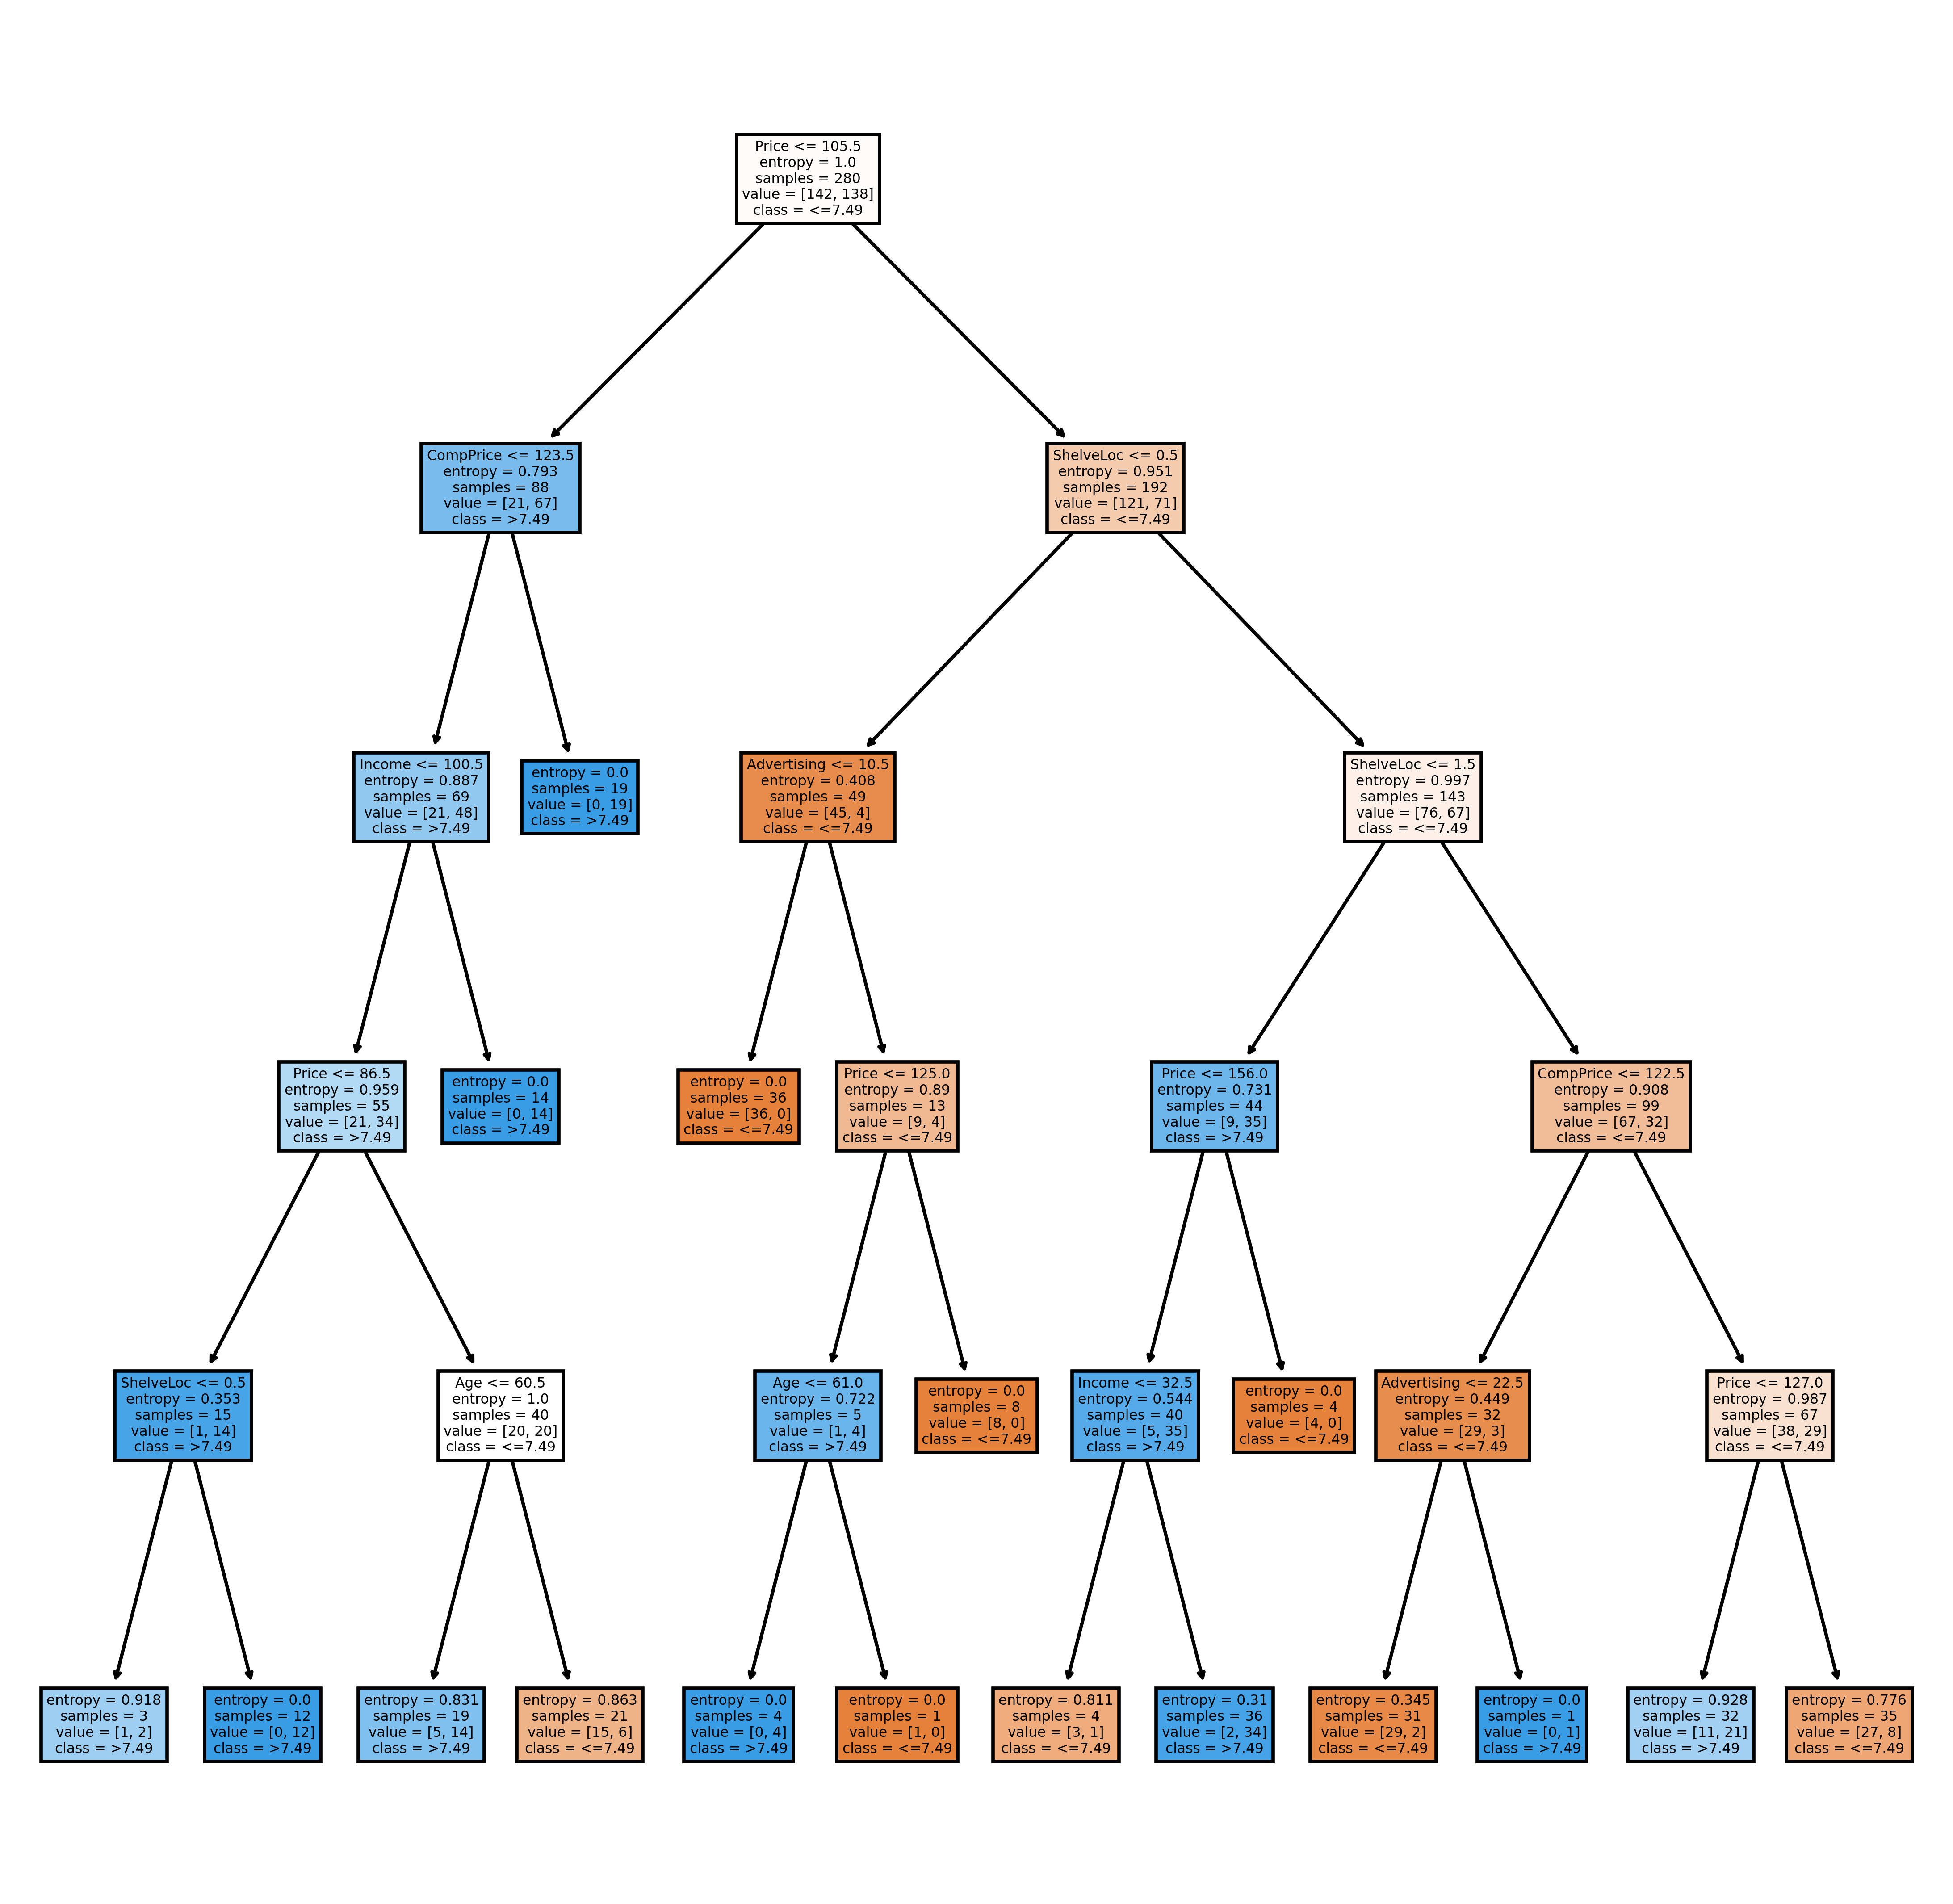

In [53]:
fn=['CompPrice','Income','Advertising', 'Population',
 'Price', 'ShelveLoc', 'Age', 'Education','Urban', 'US',]
cn=['<=7.49', '>7.49']
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=550)
tree.plot_tree(model1,
               feature_names=fn, 
               class_names=cn,
               filled= True);

In [54]:
# Prediction on Training data
pred_train1= model1.predict(x_train)
pd.Series(pred_train1).value_counts() 

1    140
0    140
dtype: int64

In [55]:
# Finding Accuracy for train data
acc_train1= accuracy_score(y_train,pred_train1)
acc_train1

0.8714285714285714

In [56]:
## Confusion matrix
confusion_mat1=pd.DataFrame(confusion_matrix(y_train,pred_train1))
confusion_mat1

,0,1
0,123,19
1,17,121


In [57]:
# Predicting the test data
pred_test=model1.predict(x_test)
pd.Series(pred_test).value_counts() # getting the count of each category
pred_test

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [58]:
# Accuracy on test data
acc_test1=accuracy_score(y_test,pred_test)
acc_test1

0.7666666666666667

In [59]:
# Confusion matrix
confusion_test1=pd.DataFrame(confusion_matrix(y_test,pred_test))
confusion_test1

,0,1
0,43,16
1,12,49


### Building Decision Tree classifier (CART) using Gini Criteria

#### Without providing max_depth

In [60]:
model_gini=DecisionTreeClassifier(criterion= 'gini')

In [61]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier()

In [62]:
# Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.725

In [63]:
model_gini.score(x_test,y_test)

0.725

In [64]:
model_gini.score(x_train,y_train)

1.0

#### with max_depth

In [65]:
model_gini1=DecisionTreeClassifier(criterion= 'gini', max_depth=3)

In [75]:
model_gini1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [76]:
# Prediction and computing the accuracy
pred1=model_gini1.predict(x_test)
np.mean(pred1==y_test)

0.7083333333333334

In [77]:
pred1

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [78]:
model_gini1.score(x_test,y_test)

0.7083333333333334

In [79]:
model_gini1.score(x_train,y_train)

0.7892857142857143